<a href="https://colab.research.google.com/github/schase15/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Steven_Chase_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


### Part 1

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [85]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-17 23:03:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.1’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-03-17 23:03:43 (611 KB/s) - ‘house-votes-84.data.1’ saved [18171/18171]



In [0]:
# Import data

df = pd.read_csv('house-votes-84.data', names= ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])

# Encode and replace to clean data

df = df.replace({'n':0, 'y': 1, '?': np.NaN})

# Drop np.NaN values, to use confidence interval function later on
df = df.dropna()

# Split dataset into Democrat and Republican

dem= df[df['party'] == 'democrat']
rep= df[df['party'] == 'republican']

In [87]:
dem.isnull().sum()

party                   0
handicapped-infants     0
water-project           0
budget                  0
physician-fee-freeze    0
el-salvador-aid         0
religious-groups        0
anti-satellite-ban      0
aid-to-contras          0
mx-missile              0
immigration             0
synfuels                0
education               0
right-to-sue            0
crime                   0
duty-free               0
south-africa            0
dtype: int64

In [0]:
def confidence_interval(data, confidence_level = 0.95):

# Variables
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof= 1)

# Standard error
  std_error = s / np.sqrt(n)

# t-stat
  t = stats.t.ppf((1 + confidence_level) / 2.0, n-1)

# Margin of error
  margin_of_error = t*std_error

  return (mean, margin_of_error, mean - margin_of_error, mean + margin_of_error)

In [89]:
mean, margin_of_error, lower, upper = confidence_interval(dem['budget'])

print("Mean is:", mean)
print("Margin of error is:", margin_of_error)
print("Lower bound is:", lower)
print("Upper bound is:", upper)

Mean is: 0.8548387096774194
Margin of error is: 0.06287195977800639
Lower bound is: 0.791966749899413
Upper bound is: 0.9177106694554258


The probability that a democrat voted for the budget bill is 0.855 plus or minus 0.063.

In [0]:
CI_dem_budget = confidence_interval(df['budget'])

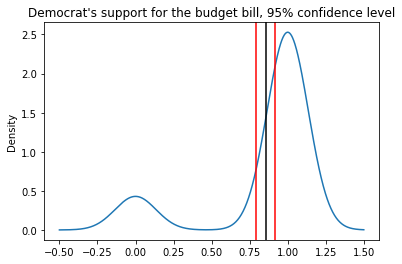

In [91]:
# Graphically

dem['budget'].plot.density()
plt.title("Democrat's support for the budget bill, 95% confidence level")
plt.axvline(x=mean, color= 'black')
plt.axvline(x=upper, color= 'red')
plt.axvline(x=lower, color= 'red')


plt.show()

In [0]:
def graph_CI (data, title):
  data.plot.density()
  plt.title(title)
  plt.axvline(x=mean, color= 'black')
  plt.axvline(x=upper, color= 'red')
  plt.axvline(x=lower, color= 'red')
 
  return(plt.show())


In [0]:
# Look at the Republican's confidence interval for the same bill

In [0]:
mean, margin_of_error, lower, upper = confidence_interval(rep['budget'])

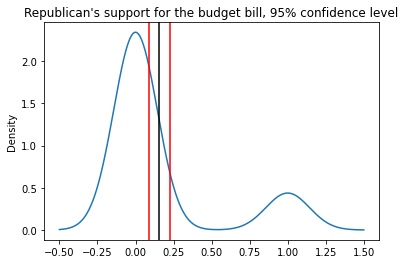

In [122]:
graph_CI(rep['budget'], "Republican's support for the budget bill, 95% confidence level")

We are 95% certain that the population mean falls within the two red bars on this graph. That is, inside of the range of our sample mean plus and minus the standard error. 

# Part 2

In [0]:
# Using the same dataset as above
# Is there a relationship between what party they were and how they voted on the budget bill 

Null Hypothesis: The two variables are independent, there is no relationship between them.

Alternative: The two variables are dependent, there is a relationship between them.

Confidence Level: 95%

In [93]:
observed = pd.crosstab(df['party'], df['budget'])
observed = observed.values
observed

array([[ 18, 106],
       [ 91,  17]])

In [0]:
# Calculate chi^2 by hand using numpy

In [105]:
observed_freq = pd.crosstab(df['party'], df['budget'], margins= True)
observed_freq

budget,0.0,1.0,All
party,,,
democrat,18,106,124
republican,91,17,108
All,109,123,232


In [108]:
row_totals = observed_freq.iloc[0:2, 2: ].values
row_totals = row_totals.T[0]
row_totals

array([124, 108])

In [109]:
col_totals = observed_freq.iloc[2:, 0:2].values
col_totals = col_totals[0]
col_totals

array([109, 123])

In [110]:
sample_size = df.shape[0]
sample_size

232

In [111]:
expected = []
for i in range(len(row_totals)):
  expected_row = []
  for column in col_totals:
    expected_val = column*row_totals[i]/sample_size
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 2)
[[58.25862069 65.74137931]
 [50.74137931 57.25862069]]


In [112]:
chi2 = ((observed - expected)**2 / expected).sum()
chi2

112.72096220353872

In [113]:
# Calculate chi^2 using scipy

from scipy import stats
final = stats.chi2_contingency(observed)
final

(109.93842817715279,
 1.0108219074853654e-25,
 1,
 array([[58.25862069, 65.74137931],
        [50.74137931, 57.25862069]]))

The chi^2 value I calculated by hand and the value I got from scipy are slightly different. I think it is because of rounding errors introduced when working by hand with the formulas. Scipy is more precise. 

Conclusion: Based on the chi^2 value of 109.93842817715279 and a p-value of 1.0108219074853654e-25, we reject the null hypothesis that there is not relationship between the party the voter belongs to and how they voted on the budget bill. This suggests that there is a relationship betweeen the two.

## Stretch Goals

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

**Write up on data/ graphs from above**

By examining the results of how the Republican party and how the Democratic party voted on the budget bill, we can confidently conclude two things. First, that there is a relationship between party line and vote. And second, that the Democratic party voted in favor of the budget bill more than the Republican party did.

First, we can examine the relationship between party allegiance and how the member voted on the budget bill by using a chi squared test to determine the independence of the two variables. Doing so returns an infintesimally small chance of the two being independent (a p-value of 1.0108219074853654e-25 which corresponds to essentially 0% chance). Having concluded with 99% confidence that the two variables, party and vote, are dependent, we can look at how each party voted.

Looking at the 95% confidence interval graphs of how each party voted on the budget bill, we can confidently say that the Democratic party voted more in favor of the budget bill than the Republican party did. We are 95% certain that the population mean falls within the two red bars on the graph for each party. 

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)